In [135]:
import pandas as pd

In [136]:
import numpy as np

In [137]:
iris = pd.read_csv("D:\machine learning\IRIS.csv")

In [138]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [139]:
iris.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# As we can observe the target variable is categorical

# Hence it is appropriate to use various classification algorithms

In [140]:
import matplotlib as plt

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

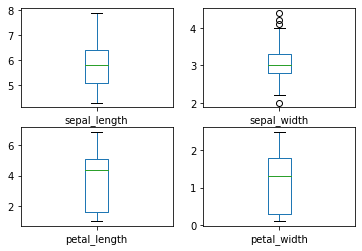

In [141]:
iris.plot(kind='box',subplots=True,layout=(2,2))

# AS we can see above, there are some outliers in the box plot of sepal width

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000172FDF64508>,
      dtype=object)

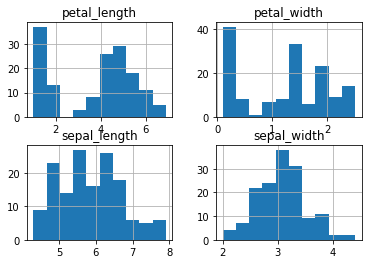

In [142]:
iris.hist()

In [143]:
#from sklearn.preprocessing import LabelEncoder

In [144]:
#lbencode = LabelEncoder()

In [145]:
y = iris['species']

In [146]:
#y = lbencode.fit_transform(y_original)

In [147]:
#y = pd.DataFrame(y)

In [148]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [149]:
X=iris.iloc[:,0:4]

In [150]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [175]:
from sklearn.model_selection import train_test_split

In [199]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3,stratify=y)

# Applying different models
# KNN

In [259]:
from sklearn.neighbors import KNeighborsClassifier

In [296]:
knn = KNeighborsClassifier(n_neighbors=8)

In [297]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [298]:
y_pred = knn.predict(X_test)

In [299]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [300]:
confusion_matrix(y_test,y_pred)


array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]], dtype=int64)

In [301]:
classification_report(y_test,y_pred)



'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        15\nIris-versicolor       1.00      0.93      0.97        15\n Iris-virginica       0.94      1.00      0.97        15\n\n       accuracy                           0.98        45\n      macro avg       0.98      0.98      0.98        45\n   weighted avg       0.98      0.98      0.98        45\n'

In [302]:
accuracy_score(y_test,y_pred)

0.9777777777777777

# Decision Tree

In [312]:
from sklearn.tree import DecisionTreeClassifier

In [313]:
tree = DecisionTreeClassifier()

In [314]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [315]:
y_pred = tree.predict(X_test)

In [316]:
confusion_matrix(y_test,y_pred)


array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 14]], dtype=int64)

In [317]:
classification_report(y_test,y_pred)


'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        15\nIris-versicolor       0.93      0.87      0.90        15\n Iris-virginica       0.88      0.93      0.90        15\n\n       accuracy                           0.93        45\n      macro avg       0.93      0.93      0.93        45\n   weighted avg       0.93      0.93      0.93        45\n'

In [318]:
tree_acc = accuracy_score(y_test,y_pred)

# Logistic Regression

In [215]:
from sklearn.linear_model import LogisticRegression

In [216]:
logreg = LogisticRegression(solver='liblinear',multi_class='ovr')

In [217]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
y_pred = logreg.predict(X_test)

In [219]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 12,  3],
       [ 0,  0, 15]], dtype=int64)

In [220]:
classification_report(y_test,y_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        15\nIris-versicolor       1.00      0.80      0.89        15\n Iris-virginica       0.83      1.00      0.91        15\n\n       accuracy                           0.93        45\n      macro avg       0.94      0.93      0.93        45\n   weighted avg       0.94      0.93      0.93        45\n'

In [224]:
logreg_acc = accuracy_score(y_test,y_pred)

# Naive Bayes Classifier

In [236]:
from sklearn.naive_bayes import GaussianNB

In [237]:
naive = GaussianNB()

In [238]:
naive.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [239]:
y_pred=naive.predict(X_test)

In [240]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 13]], dtype=int64)

In [241]:
classification_report(y_test,y_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        15\nIris-versicolor       0.88      0.93      0.90        15\n Iris-virginica       0.93      0.87      0.90        15\n\n       accuracy                           0.93        45\n      macro avg       0.93      0.93      0.93        45\n   weighted avg       0.93      0.93      0.93        45\n'

In [243]:
gauss_acc = accuracy_score(y_test,y_pred)

# SVC

In [245]:
from sklearn.svm import SVC

In [248]:
svc = SVC(probability=True,kernel='rbf')

In [249]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [251]:
y_pred = svc.predict(X_test)

In [252]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 15]], dtype=int64)

In [253]:
classification_report(y_test,y_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        15\nIris-versicolor       1.00      0.87      0.93        15\n Iris-virginica       0.88      1.00      0.94        15\n\n       accuracy                           0.96        45\n      macro avg       0.96      0.96      0.96        45\n   weighted avg       0.96      0.96      0.96        45\n'

In [255]:
svc_acc = accuracy_score(y_test,y_pred)

In [320]:
accuracy = {}
accuracy['knn']= knn_acc
accuracy['svc']= svc_acc
accuracy['gauss']= gauss_acc
accuracy['tree']= tree_acc
accuracy['logreg']= logreg_acc

In [321]:
accuracy

{'knn': 0.9777777777777777,
 'svc': 0.9555555555555556,
 'gauss': 0.9333333333333333,
 'tree': 0.9333333333333333,
 'logreg': 0.9333333333333333}

In [322]:
max(accuracy.values())

0.9777777777777777

In [324]:
for i,j in accuracy.items():
    if j == max(accuracy.values()):
        print("Best algorithm in given accuracies is : ",i)

Best algorithm in given accuracies is :  knn
